# Oily Giant

# Tabla de contenido

* [Introducción](#introduccion)
* [1. Inicialización](#inicializacion)
    * [1.1 Revisión de datos ausentes y duplicados](#ausentes)
    * [1.2 Datos estadísticos](#describe)
    
* [2. Modelo](#modelo)
* [3. Preparación de datos para ganancias](#preparacion)
    
* [4. Cálculo de ganancias](#ganancias)
    
* [5. Cálculo de riesgos y ganancias por región](#riesgos) 
      
* [8. Conclusiones](#conclusion)

<div id="introduccion"/>

# Introducción

La compañía Oily Giant requiere encontrar la mejor localización para perforar un nuevo pozo petrolero. Para ello debe construir un modelo que prediga el volumen de reservas de acuerdo a los datos proporcionados por cada región.

<div id="inicializacion"/>

## Inicialización

In [1]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
#carga de datos
well_data_0 = pd.read_csv("/datasets/geo_data_0.csv")
well_data_1 = pd.read_csv("/datasets/geo_data_1.csv")
well_data_2 = pd.read_csv("/datasets/geo_data_2.csv")

In [3]:
# Revisión de la información
well_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
well_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
well_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
well_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [7]:
well_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [8]:
well_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<div id="ausentes"/>

### Revisión de datos ausentes y duplicados

In [9]:
well_data_0.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [10]:
well_data_1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [11]:
well_data_2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [12]:
well_data_0.duplicated().sum()

0

In [13]:
well_data_1.duplicated().sum()

0

In [14]:
well_data_2.duplicated().sum()

0

De acuerdo a la información contenida en las 3 tablas de datos de pozos:

- Tienen 5 columnas y 100000 registros cada una.
- Las características f0, f1 y f2 son datos numéricos.
- El target es numérico.
- No hay datos ausentes.
- No hay datos duplicados.

<div id="describe"/>

### Datos estadísticos

In [15]:
well_data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


<AxesSubplot:>

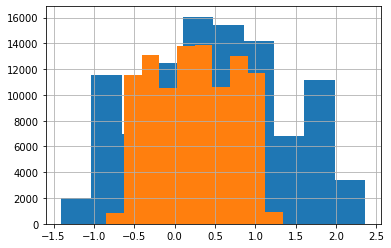

In [16]:
well_data_0["f0"].hist()
well_data_0["f1"].hist()


<AxesSubplot:>

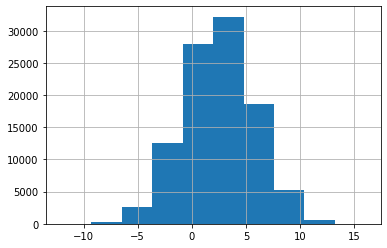

In [17]:
well_data_0["f2"].hist()

<AxesSubplot:>

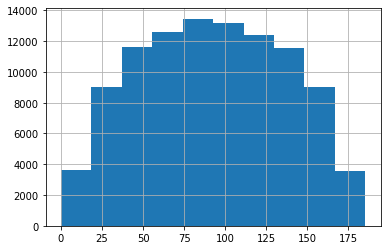

In [18]:
well_data_0["product"].hist()

In [19]:
corr_matrix=well_data_0.corr(method="pearson")
corr_matrix

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [20]:
well_data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


<AxesSubplot:>

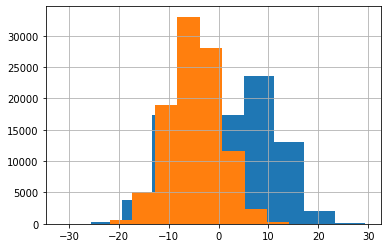

In [21]:
well_data_1["f0"].hist()
well_data_1["f1"].hist()

<AxesSubplot:>

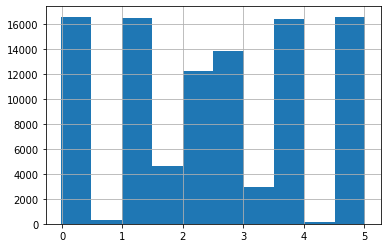

In [22]:
well_data_1["f2"].hist()

<AxesSubplot:>

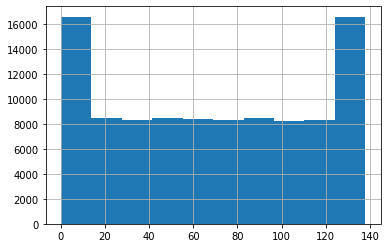

In [23]:
well_data_1["product"].hist()

In [24]:
corr_matrix=well_data_1.corr(method="pearson")
corr_matrix

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


In [25]:
well_data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


<AxesSubplot:>

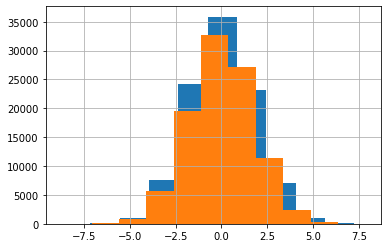

In [26]:
well_data_2["f0"].hist()
well_data_2["f1"].hist()

<AxesSubplot:>

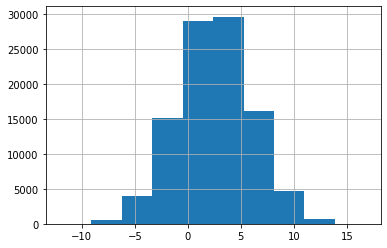

In [27]:
well_data_2["f2"].hist()

<AxesSubplot:>

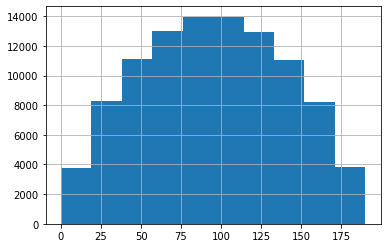

In [28]:
well_data_2["product"].hist()

In [29]:
corr_matrix=well_data_2.corr(method="pearson")
corr_matrix

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


De acuerdo a la información estadística se tiene:

Para la región "0" (well_data_0):
1. las características f0, f1 y f2 parecen tender a una distribución normal dado que la media es casi igual a la mediana en magnitud.
2. las características f0 y f1 muestran una débil relación con "product", solo es "f2" la que mayor relación positiva muestra (0.48), es decir, a medida que aumenta f2, aumentará la producción.
3. El target muestra una distribución de sus datos normal, donde la media y la mediana tienden a ser iguales.

Para la región "1" (well_data_1):
1. Las características f0 y f1 tienden a una distribución normal con la media muy cercana a la mediana, sin embargo, f2 tiende a una distribución asimétrica positiva con la media ligeramente mayor a la mediana. Los valores de f2 se presentan de manera puntual con igual frecuencia en 0, 1, 3.5 y 4.5.
2. "f2" muestra una fuerte relación positiva con la producción(0.99), es decir, esta característica impacta significativamente sobre el volumen de hidrocarburos de los pozos del campo 1 y por su valor tiende a una relación lineal.
3. El target en la región "1" muestra una asimetría en los extremos y el resto de los datos se distribuyen de manera constante con la misma frecuencia en el rango 10 - 130.

Para la región "2" (well_data_2):
1. f0 y f1 tienden a una distribución asimétrica con la mediana ligeramente mayor que la media, su relación con el target es practicamente nula e inversa. En cambio f2 si parece mantener una distribución normal con la media muy similar a la mediana y muestra una relación positiva no tan débil con "product" de 0.44.
2. El target muestra una distribución de sus datos normal, donde la media y la mediana tienden a ser iguales.


- La característica "id" presente en las 3 tablas de datos se eliminará puesto que no impactará en el modelo, ya que son identificadores.


In [30]:
# eliminación de la columna "id"
well_data_0.drop("id", axis=1, inplace=True)
well_data_1.drop("id", axis=1, inplace=True)
well_data_2.drop("id", axis=1, inplace=True)

<div id="modelo"/>

## Modelo 

In [31]:
#definir función para el modelo
def modelo(well_data):
    numeric = ["f0", "f1", "f2"]
    scaler = StandardScaler()
    well_data[numeric] = pd.DataFrame(scaler.fit_transform(well_data[numeric]))
    
    features = well_data.drop("product", axis=1)
    target = well_data["product"]
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
    
    model_lr = LinearRegression()
    model_lr.fit(features_train, target_train)
    predictions_lr = model_lr.predict(features_valid)
    mse = mean_squared_error(target_valid, predictions_lr)
    rmse = round(mse**0.5, 2)
    predicted_mean = round(predictions_lr.mean(), 2)
    
    
    model_lr = LinearRegression()
    scores = cross_val_score(model_lr, features, target, cv=5)
    final_score = (pd.Series(scores)).mean()
    
    return model_lr, features_valid, target_valid, predictions_lr, rmse, predicted_mean, final_score

In [32]:
model_lr_0, features_valid_0, target_valid_0, predictions_lr_0, rmse_0, predicted_mean_0, final_score_0 = modelo(well_data_0)
model_lr_1, features_valid_1, target_valid_1, predictions_lr_1, rmse_1, predicted_mean_1, final_score_1 = modelo(well_data_1)
model_lr_2, features_valid_2, target_valid_2, predictions_lr_2, rmse_2, predicted_mean_2, final_score_2 = modelo(well_data_2)

In [33]:
resultados = pd.DataFrame({
    "Region": ["Region_0", "Region_1", "Region_2"],
    "RMSE": [rmse_0, rmse_1, rmse_2],
    "volumen_actual_promedio": [round(well_data_0["product"].mean(),2), round(well_data_1["product"].mean(),2), round(well_data_2["product"].mean(),2)],
    "volumen_calculado_promedio": [predicted_mean_0, predicted_mean_1, predicted_mean_2],
    "score":[round(final_score_0, 2), round(final_score_1, 2), round(final_score_2, 2)]
})
resultados

,Region,RMSE,volumen_actual_promedio,volumen_calculado_promedio,score
0,Region_0,37.58,92.50,92.59,0.28
1,Region_1,0.89,68.83,68.73,1.00
2,Region_2,40.03,95.00,94.97,0.20


De los resultados se observa:

- El modelo de regresión lineal hace una buena predicción de los resultados.
- A mayor valor de volumen actual, mayor es el valor de RMSE obtenido, es decir, el modelo se hace menos preciso, siendo la región "0" y la región "2" los que mayor RMSE muestran, es decir, parece que hay una sobrepredicción.
- La mejor predicción del volumen se obtuvo en la región 2.
- El menor RMSE se alcanzó en la región 1, por lo que este modelo predice mejor.


<div id="preparacion"/>

## Preparación de datos para ganancia

In [34]:
#condiciones iniciales
region_localizacion = 500 
mejores_localizacion_region = 200  
costo_capital = 100 * 10**6 # 100 USD millones
costo_bbl = 4500  
risk_de_perdida = 0.025

In [35]:
#volumen de reservas
revenue = costo_bbl * mejores_localizacion_region
volumen_reservas = costo_capital / revenue
print('Volumen para desarrollar pozo sin perdida de reservas: %.2f' % volumen_reservas, 'Thousand Stock Tank Barrels (STB).')

Volumen para desarrollar pozo sin perdida de reservas: 111.11 Thousand Stock Tank Barrels (STB).


El volumen mínimo de producción debe ser de 111.11 miles de barriles para ser rentable, sin embargo, de acuerdo a los pronósticos promedio obtenidos anteriormente, las 3 regiones están por debajo en el promedio de producción.

<div id="ganancias"/>

## Cálculo de ganancias

In [36]:
def ganancias(predictions, target, count, region):
    mejor_volumen = pd.Series(predictions, index=target.index).sort_values(ascending=False)
    volumen_reservas_target = target[mejor_volumen.index][:count] #se seleccionan las 200 mejores localizaciones
    total_reservas_mean = volumen_reservas_target.mean()
    total_reservas = volumen_reservas_target.sum()
    ganancias = total_reservas*costo_bbl - costo_capital
    #print("volumen objetivo de reservas",region, ":", round(total_reservas/1000,2), "MMSTB")
    #print("Ganancia por volumen de reservas", region, ":", round(ganancias, 2), "$")
    #print("Ganancia promedio por reservas", region, ":", round((total_reservas_mean*costo_bbl*mejores_localizacion_region)-costo_capital,2))
    return total_reservas, ganancias

In [37]:
total_reservas_0, ganancias_0 = ganancias(predictions_lr_0, target_valid_0, 200, "Región 0")

In [38]:
total_reservas_1, ganancias_1 = ganancias(predictions_lr_1, target_valid_1, 200, "Región 1")

In [39]:
total_reservas_2, ganancias_2 = ganancias(predictions_lr_2, target_valid_2, 200, "Región 2")

In [40]:
resultados_1 = pd.DataFrame({
    "Region": ["Region_0", "Region_1", "Region_2"],
    "volumen_objetivo_de_reservas": [round(total_reservas_0/1000,2), round(total_reservas_1/1000,2), round(total_reservas_2/1000,2)],
    "ganancia_por volumen_de_reservas": [round(ganancias_0,2), round(ganancias_1,2), round(ganancias_2,2)],
})
resultados_1

,Region,volumen_objetivo_de_reservas,ganancia_por volumen_de_reservas
0,Region_0,29.60,33208260.43
1,Region_1,27.59,24150866.97
2,Region_2,28.25,27103499.64


Observando los resultados, se aprecia que la mayor ganancia se obtendría con perforaciones en el campo de la región 0. 


<div id="riesgos"/>

## Cálculo de riesgos y ganancias por región

In [41]:
#bootstrapping
def revenue(predictions, target, count):
    mejor_volumen = pd.Series(predictions, index=target.index).sort_values(ascending=False)
    volumen_reservas_target = target[mejor_volumen.index][:count] #se seleccionan las 200 mejores localizaciones
    total_reservas_mean = volumen_reservas_target.mean()
    total_reservas = volumen_reservas_target.sum()
    ganancias = total_reservas*costo_bbl - costo_capital
    return ganancias
    
def bootstrapping(predictions, target):
    state = np.random.RandomState(12345)
    beneficio = []
    for i in range(1000):
        pred = pd.Series(predictions, index = target.index)
        target_subsample = target.sample(n=region_localizacion, replace=True, random_state=state)
        prob_subsample = pred[target_subsample.index]
        beneficio.append(revenue(prob_subsample, target_subsample, mejores_localizacion_region))
    return pd.Series(beneficio)
    
def riesgo(predictions, target):
    beneficio = bootstrapping(predictions, target)
    beneficio_promedio = beneficio.mean()
    confidence_interval = (beneficio.quantile(0.025), beneficio.quantile(0.975))
    perdida = beneficio[beneficio < 0]
    riesgo_perdida = (len(perdida) / len(beneficio))*100
    
    return beneficio_promedio, confidence_interval, riesgo_perdida


In [42]:
beneficio_promedio_0, confidence_interval_0, riesgo_perdida_0 = riesgo(predictions_lr_0, target_valid_0)

In [43]:
beneficio_promedio_1, confidence_interval_1, riesgo_perdida_1 = riesgo(predictions_lr_1, target_valid_1)

In [44]:
beneficio_promedio_2, confidence_interval_2, riesgo_perdida_2 = riesgo(predictions_lr_2, target_valid_2)

In [45]:
resultados_2 = pd.DataFrame({
    "Region": ["Region_0", "Region_1", "Region_2"],
    "beneficio_promedio": [round(beneficio_promedio_0,2), round(beneficio_promedio_1,2), round(beneficio_promedio_2,2)],
    "intervalo_de_confianza 95%": [confidence_interval_0, confidence_interval_1, confidence_interval_2],
    "riesgo_de_pérdida %": [riesgo_perdida_0, riesgo_perdida_1, riesgo_perdida_2],
})
resultados_2

,Region,beneficio_promedio,intervalo_de_confianza 95%,riesgo_de_pérdida %
0,Region_0,4259385.27,"(-1020900.9483793724, 9479763.533583675)",6.0
1,Region_1,5152227.73,"(688732.2537050088, 9315475.912570495)",1.0
2,Region_2,4350083.63,"(-1288805.473297878, 9697069.541802654)",6.4


In [46]:
#cálculo de beneficio por region
region_0 = bootstrapping(predictions_lr_0, target_valid_0)
region_1 = bootstrapping(predictions_lr_1, target_valid_1)
region_2 = bootstrapping(predictions_lr_2, target_valid_2)

Text(0.5, 0, '10 millones USD')

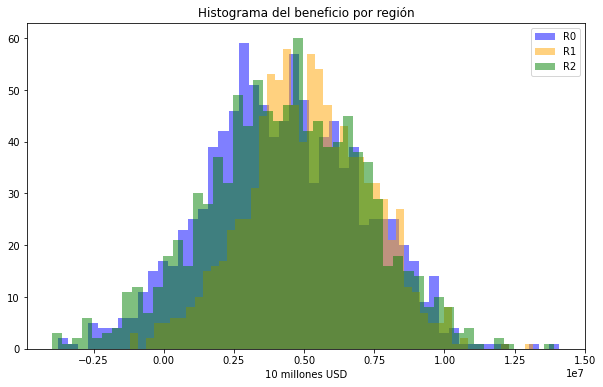

In [47]:
#histograma
plt.figure(figsize=(10,6))
plt.hist(region_0, bins=50, alpha=0.5, color ="blue", label="R0")
plt.hist(region_1, bins=50, alpha=0.5, color = "orange", label = "R1")
plt.hist(region_2, bins=50, alpha=0.5, color = "green", label="R2")
plt.legend(loc="upper right")
plt.title("Histograma del beneficio por región")
plt.xlabel("10 millones USD")

De acuerdo a la dristribución y al cálculo de riesgo se observa:

1. La región 1 presenta el menor riesgo de pérdida asociado.
2. La distribución por bootstrapping para la región "1", muestra un comportamiento más cercano a la distribución normal con valores más altos y menos dispersión, por lo que se concluye que la mejor región para la perforación es la que corresponde a esta región(región 1). Además esta región presenta una relación directa muy fuerte entre "f2" y el target (0.99) por lo que el cálculo está más sustentado. 
3. Los intervalos de confianza también confirman que la región "1" es la que el beneficio está comprendido entre valores positivos, confirmando así que en esta región los nuevos pozos a perforar tendrán mayor éxito.

<div id="conclusion"/>

## Conclusiones

De los datos se concluye:

1. Hay 3 regiones petroleras demarcadas por "0", "1" y "2" y en ellas, la base de datos está conformada por 5 columnas y 100000 datos.
2. No hay datos ausentes.
3. No hay datos duplicados.
4. Las características y el target son datos numéricos.
5. La mayor parte de las características "f0", "f1" y "f2" muestran una distribución normal, a excepción de la región "1" donde "f2", muestra una relación lineal directa o positiva con el target.
6. El objetivo "product" igualmente muestra en la mayoría de las regiones una distribución normal.

De acuerdo al modelo de machine learning, la empresa Oily Giant:

1. Se recomienda perforar los pozos petroleros nuevos en la región demarcada como "1" puesto que es la que menor riesgo ofrece (1%) y valores más altos de beneficio de acuerdo a la técnica de bootstrapping. Así también se aprecia que el intervalo de confianza de esta región está comprendido siempre entre valores positivos del beneficio.